In [1]:
using FFTW, Plots

In [11]:
function conv1d(u::AbstractVector{T}, v::AbstractVector{S}) where {T<:Number, S<:Number}
    M, N = length(u), length(v)
    TT = promote_type(T, S)
    r = zeros(TT, M+N)

    for i ∈ 1:M, j = 1:N
        r[i+j] += u[i]*v[j]
    end
    return r
end

function xcorr1d(u::AbstractVector{T}, v::AbstractVector{S}) where {T<:Number, S<:Number}
    return conv1d(u, v[end:-1:1])
end

xcorr1d (generic function with 1 method)

In [81]:
function _dft(f::Vector{T}, inverse = false) where T<:Union{AbstractFloat, Complex}
    N = length(f)
    if T <:AbstractFloat
        F = zeros(Complex{T}, N)
    else 
        F = zeros(eltype(f), N)
    end
    if inverse
        for i in 1:N
            F[i] = [f[k] * exp(2.0im * π* (i-1) * (k-1)/N) for k ∈ 1:N]./N |> sum
        end
    else     
        for i in 1:N
            F[i] = [f[k] * exp(-2.0im * π* (i-1) * (k-1)/N) for k ∈ 1:N] |> sum
        end
    end

    return F
end

dft = v-> _dft(v, false)
idft = v-> _dft(v, true)

#77 (generic function with 1 method)

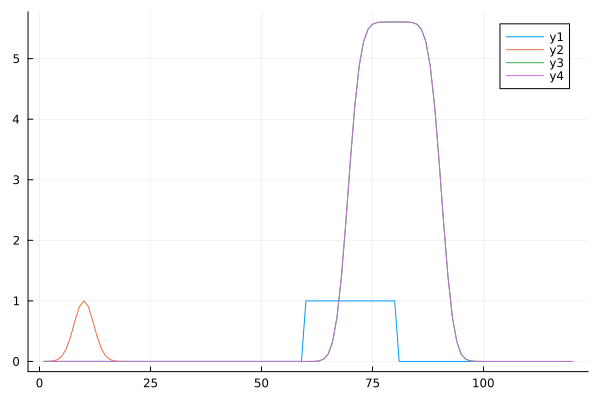

In [82]:
plot(u)
plot!(v)
plot!(r)
plot!(conv1d(v, u))

In [83]:
f=[0, 0, 0, 1, 0, 0, 0, 0]
g = [1,2, 4, 2, 8]
conv1d(f, g)

13-element Vector{Int64}:
 0
 0
 0
 0
 1
 2
 4
 2
 8
 0
 0
 0
 0

In [85]:
idft(dft([1,2,3,4.0, 5.0+1.0im, 2, -1]))

7-element Vector{ComplexF64}:
  1.0000000000000013 + 0.0im
   2.000000000000001 - 2.1094237467877974e-15im
   2.999999999999999 - 1.887379141862766e-15im
  3.9999999999999982 + 1.609823385706477e-15im
   4.999999999999999 + 1.0000000000000009im
  1.9999999999999964 + 8.881784197001252e-16im
 -1.0000000000000002 + 3.219646771412954e-15im

In [87]:
ifft(fft([1,2,3,4.0, 5.0+1.0im, 2, -1]))

7-element Vector{ComplexF64}:
  0.9999999999999994 + 0.0im
                 2.0 + 9.467031419798322e-17im
                 3.0 + 1.09055344419059e-17im
                 4.0 - 1.2688263138573217e-16im
                 5.0 + 1.0im
                 2.0 + 4.999895583725711e-17im
 -0.9999999999999998 - 1.9629909463453284e-17im

In [88]:
fft([1,1,1,1,1])

5-element Vector{ComplexF64}:
 5.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [91]:
ifft(fft([0,0,1,0,0]))

5-element Vector{ComplexF64}:
                    0.0 + 0.0im
 -6.187887117204537e-17 + 0.0im
                    1.0 + 0.0im
                    0.0 + 0.0im
 -2.693897079796716e-17 + 0.0im

In [93]:
ifft(fft([1,0,0,0,0]))

5-element Vector{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im